In [75]:
#imports
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import time

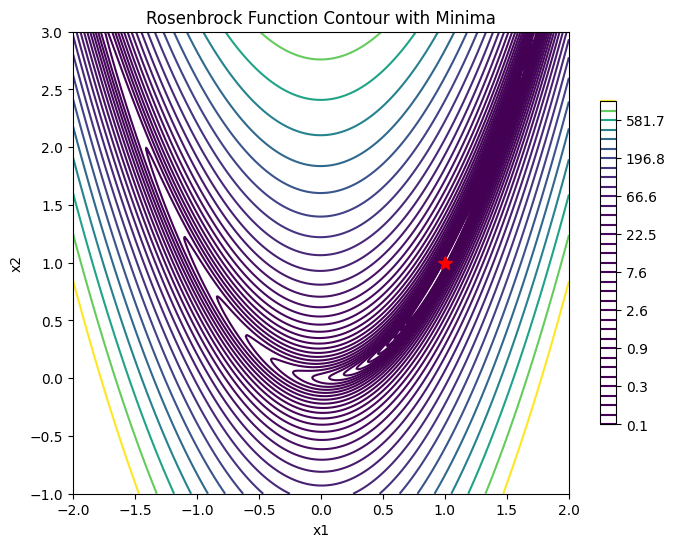

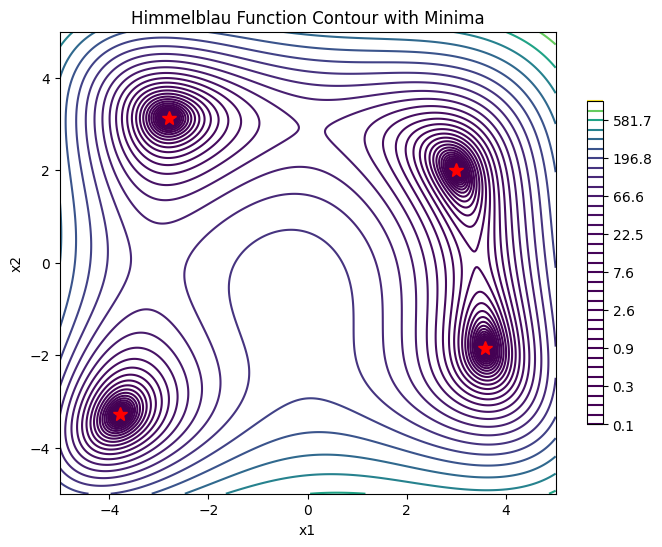

In [76]:
# Rosenbrock function with one variable (x) that is a bidimensional vector
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Himmelblau function with one variable (x) that is a vector
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Plot function for a generic function
def plot_function(func, x_range, y_range, title, min_points):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    x, y = np.meshgrid(x, y)
    z = func([x, y])

    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contour(x, y, z, levels=np.logspace(-1, 3, 35), cmap='viridis')
    ax.plot(*zip(*min_points), 'r*', markersize=10)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    plt.colorbar(contour, ax=ax, shrink=0.7)
    plt.show()

# Minimum point for Rosenbrock's function
min_points_rosenbrock = [(1, 1)]

# Minima points for Himmelblau's function
min_points_himmelblau = [(3.00, 2.00), (3.584, -1.848), (-2.805, 3.131), (-3.779, -3.283)]

# Plot for Rosenbrock's function
plot_function(rosenbrock, x_range=(-2, 2), y_range=(-1, 3), 
              title='Rosenbrock Function Contour with Minima', 
              min_points=min_points_rosenbrock)

# Plot for Himmelblau's function
plot_function(himmelblau, x_range=(-5, 5), y_range=(-5, 5), 
              title='Himmelblau Function Contour with Minima', 
              min_points=min_points_himmelblau)


In [77]:
# Rosenbrock function with two variables (x,y)
def rosenbrock(x,y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Rosenbrock gradient function with two variables (x,y)
def rosenbrock_gradient(x,y):
    return np.array([-2 * (1 - x) - 400 * x * (y - x**2), 
                     200 * (y - x**2)])

# Himmelblau function with two variables (x,y)
def himmelblau(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Himmelblau gradient function with two variables (x,y)
def himmelblau_gradient(x,y):
    return np.array([2 * (2 * x * (x**2 + y - 11) + x + y**2 - 7),
                     2 * (x**2 + y - 11 + 2 * y * (x + y**2 - 7))])


In [78]:
# Function for the Armijo stepsize used in the seepest_descent function later
def armijo_step(fn, x, y, dx, dy):
    eps = 1e-6
    sigma = 1e-3
    min_step_size = 1e-8
    b_min, b_max = 0.5, 0.9
    t = 0.5
    while fn(x - t * dx, y - t * dy) > fn(x, y) - t * sigma * (dx * dx + dy * dy) + eps:
        t = np.random.uniform(t * b_min, t * b_max)
    return max(t, min_step_size)

In [79]:
# Steepest_descent function with variables:
# - func: for the function used (Rosenbrock or Himmelblau)
# - grad_func: for the gradient function used (Rosenbrock or Himmelblau)
# - x0 and y0: for the starting point ((0, 0) or (pi+1, pi-1))
# - step_size: fixed stepsize, if used
# - max_iter: set with 1000 iterations
# - tol: acceptable error to stop the iteration before hitting the max_iter, set to 1e-9
# - variable_step: set with False (fixed stepsize), if True uses the Armijo stepsize

def steepest_descent(func, grad_func, x0, y0, step_size, max_iter=1000, tol=1e-9, variable_step=False):
    x, y = np.array(x0, dtype=float), np.array(y0, dtype=float)
    historyx, historyy = [x.copy()], [y.copy()]
    start_time = time.time()
    
    for i in range(max_iter):
        gradient = grad_func(x,y)
        dx, dy = gradient[0], gradient[1]
        if np.linalg.norm(gradient) < tol:
            break
        if variable_step: # Armijo stepsize if variable_step is True
            step_size = armijo_step(func,x,y,dx,dy)
        x -= step_size * dx
        y -= step_size * dy
        historyx.append(x.copy())
        historyy.append(y.copy())
    
    end_time = time.time()
    return [x,y], np.array(historyx), np.array(historyy), end_time - start_time


In [80]:
# Implementation section
starting_points = [(0, 0), (np.pi + 1, np.pi - 1)] #starting points
step_sizes = 0.001  # Example constant step size

results = {}

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes)
        results[(func_name, x0[0], x0[1], step_sizes, False)] = (min_point, iter_count, cpu_time)

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes, variable_step=True)
        results[(func_name, x0[0], x0[1], step_sizes, True)] = (min_point, iter_count, cpu_time)

# output
for key, value in results.items():
    print(f"Function: {key[0]}, Starting Point: ({key[1]},{key[2]}), Variable Step: {key[4]}")
    print(f"Minimum Point: {value[0]}, Iterations: {len(value[1])-1}, CPU Time: {value[2]:.4f} seconds\n")


C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:7: RuntimeWarning: overflow encountered in square
  return np.array([-2 * (1 - x) - 400 * x * (y - x**2),
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:8: RuntimeWarning: overflow encountered in square
  200 * (y - x**2)])
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:7: RuntimeWarning: invalid value encountered in subtract
  return np.array([-2 * (1 - x) - 400 * x * (y - x**2),
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:8: RuntimeWarning: invalid value encountered in subtract
  200 * (y - x**2)])


Function: Rosenbrock, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(0.67388605), array(0.45255952)], Iterations: 1000, CPU Time: 0.0189 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(nan), array(nan)], Iterations: 1000, CPU Time: 0.0234 seconds

Function: Himmelblau, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(3.), array(2.)], Iterations: 937, CPU Time: 0.0223 seconds

Function: Himmelblau, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(3.), array(2.)], Iterations: 863, CPU Time: 0.0130 seconds

Function: Rosenbrock, Starting Point: (0,0), Variable Step: True
Minimum Point: [array(0.90958725), array(0.8274152)], Iterations: 1000, CPU Time: 0.1322 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: True
Minimum Point: [array(1.83758161), array(3.37993306)], Iteration

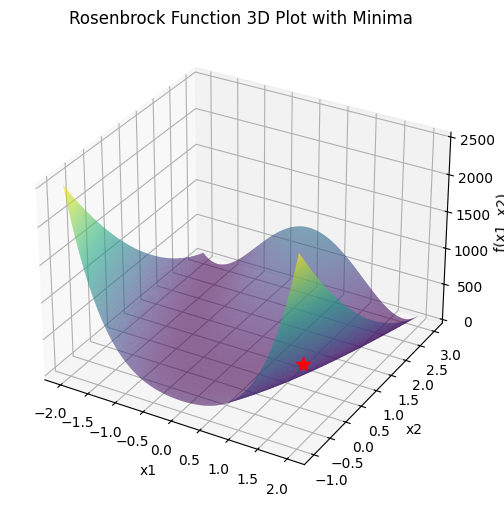

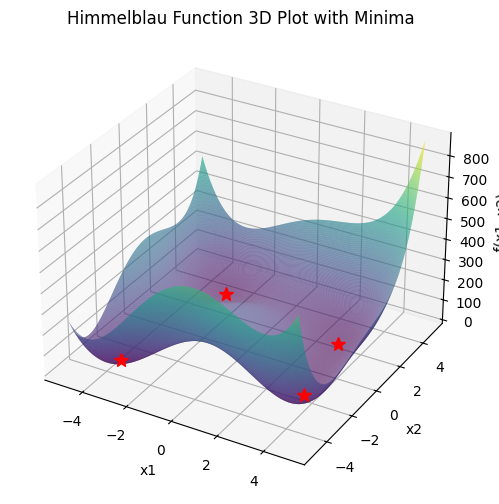

In [81]:
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the 3D surface of the functions with minima points
def plot_3d_function(func, x_range, y_range, title, min_points):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    x, y = np.meshgrid(x, y)
    z = func(x, y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', alpha=0.8)
    ax.plot(*zip(*min_points), 'r*', markersize=10, zorder=5)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    plt.show()

# Minima points for Rosenbrock's function
min_points_rosenbrock_3d = [(1, 1, rosenbrock(1, 1))]

# Minima points for Himmelblau's function
min_points_himmelblau_3d = [(3.00, 2.00, himmelblau(3.00, 2.00)), 
                            (3.584, -1.848, himmelblau(3.584, -1.848)), 
                            (-2.805, 3.131, himmelblau(-2.805, 3.131)), 
                            (-3.779, -3.283, himmelblau(-3.779, -3.283))]

# Plot for Rosenbrock's function/
plot_3d_function(rosenbrock, x_range=(-2, 2), y_range=(-1, 3), 
                 title='Rosenbrock Function 3D Plot with Minima', 
                 min_points=min_points_rosenbrock_3d)

# Plot for Himmelblau's function
plot_3d_function(himmelblau, x_range=(-5, 5), y_range=(-5, 5), 
                 title='Himmelblau Function 3D Plot with Minima', 
                 min_points=min_points_himmelblau_3d)


In [82]:
# Implementation section with more iterations (5000)
starting_points = [(0, 0), (np.pi + 1, np.pi - 1)] #starting points
step_sizes = 0.001  # Example constant step size

results2 = {}

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes, max_iter=5000)
        results2[(func_name, x0[0], x0[1], step_sizes, False)] = (min_point, iter_count, cpu_time)

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes, variable_step=True, max_iter=5000)
        results2[(func_name, x0[0], x0[1], step_sizes, True)] = (min_point, iter_count, cpu_time)

# output
for key, value in results2.items():
    print(f"Function: {key[0]}, Starting Point: ({key[1]},{key[2]}), Variable Step: {key[4]}")
    print(f"Minimum Point: {value[0]}, Iterations: {len(value[1])-1}, CPU Time: {value[2]:.4f} seconds\n")


C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:7: RuntimeWarning: overflow encountered in square
  return np.array([-2 * (1 - x) - 400 * x * (y - x**2),
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:8: RuntimeWarning: overflow encountered in square
  200 * (y - x**2)])
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:7: RuntimeWarning: invalid value encountered in subtract
  return np.array([-2 * (1 - x) - 400 * x * (y - x**2),
C:\Users\Marco Plazzogna\AppData\Local\Temp\ipykernel_32112\1767629292.py:8: RuntimeWarning: invalid value encountered in subtract
  200 * (y - x**2)])


Function: Rosenbrock, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(0.95617915), array(0.91409854)], Iterations: 5000, CPU Time: 0.0802 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(nan), array(nan)], Iterations: 5000, CPU Time: 0.0675 seconds

Function: Himmelblau, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(3.), array(2.)], Iterations: 937, CPU Time: 0.0159 seconds

Function: Himmelblau, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(3.), array(2.)], Iterations: 863, CPU Time: 0.0130 seconds

Function: Rosenbrock, Starting Point: (0,0), Variable Step: True
Minimum Point: [array(0.99758208), array(0.99529512)], Iterations: 5000, CPU Time: 0.6989 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: True
Minimum Point: [array(1.54959484), array(2.40179653)], Iteratio

In [83]:
# Implementation with lower fixed step size and more iterations (5000 and 50000)
starting_points = [(0, 0), (np.pi + 1, np.pi - 1)] #starting points
step_sizes = 0.0001  # Example constant step size

results3 = {}
results4 = {}

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes, max_iter=5000)
        results3[(func_name, x0[0], x0[1], step_sizes, False)] = (min_point, iter_count, cpu_time)

for func, grad_func, func_name in [(rosenbrock, rosenbrock_gradient, 'Rosenbrock'),
                                   (himmelblau, himmelblau_gradient, 'Himmelblau')]:
    for x0 in starting_points:
        min_point, iter_count, history, cpu_time = steepest_descent(
            func, grad_func, x0[0], x0[1], step_sizes, max_iter=50000)
        results4[(func_name, x0[0], x0[1], step_sizes, False)] = (min_point, iter_count, cpu_time)

# output
for key, value in results3.items():
    print(f"Function: {key[0]}, Starting Point: ({key[1]},{key[2]}), Variable Step: {key[4]}")
    print(f"Minimum Point: {value[0]}, Iterations: {len(value[1])-1}, CPU Time: {value[2]:.4f} seconds\n")

for key, value in results4.items():
    print(f"Function: {key[0]}, Starting Point: ({key[1]},{key[2]}), Variable Step: {key[4]}")
    print(f"Minimum Point: {value[0]}, Iterations: {len(value[1])-1}, CPU Time: {value[2]:.4f} seconds\n")



Function: Rosenbrock, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(0.50840033), array(0.25600713)], Iterations: 5000, CPU Time: 0.1729 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(1.51877493), array(2.30821826)], Iterations: 5000, CPU Time: 0.2253 seconds

Function: Himmelblau, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(2.99999862), array(2.00000334)], Iterations: 5000, CPU Time: 0.2750 seconds

Function: Himmelblau, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Point: [array(3.00000022), array(1.99999947)], Iterations: 5000, CPU Time: 0.2737 seconds

Function: Rosenbrock, Starting Point: (0,0), Variable Step: False
Minimum Point: [array(0.95614631), array(0.91403561)], Iterations: 50000, CPU Time: 2.1672 seconds

Function: Rosenbrock, Starting Point: (4.141592653589793,2.141592653589793), Variable Step: False
Minimum Poin